In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
df_yes = pd.read_csv('final_lq_yes.csv')
df_no = pd.read_csv('final_lq_no.csv')

In [4]:
df_yes

,Unnamed: 0,dong,quarter,food_service_lq,retail_lq,franchise_lq,youth_sales_lq,total_net_growth_rate
0,0,강남구 개포1동,20221,0.326407,1.382552,0.470243,0.022843,0.000000
1,1,강남구 개포1동,20221,0.326407,1.382552,0.470243,0.022843,-0.621118
2,2,강남구 개포1동,20221,0.326407,1.382552,0.470243,0.022843,-1.242236
3,3,강남구 개포1동,20222,0.322402,1.384358,0.471222,0.285831,0.000000
4,4,강남구 개포1동,20223,0.321892,1.379730,0.472764,0.096654,0.621118
...,...,...,...,...,...,...,...,...
29859,29859,중랑구 중화2동,20242,1.294261,1.025778,0.815733,0.797195,1.614274
29860,29860,중랑구 중화2동,20242,1.294261,1.025778,0.815733,0.797195,2.463891
29861,29861,중랑구 중화2동,20242,1.294261,1.025778,0.815733,0.797195,2.378929
29862,29862,중랑구 중화2동,20242,1.294261,1.025778,0.815733,0.797195,2.293968


In [5]:
df_yes = df_yes.drop(columns=['Unnamed: 0'])

In [6]:
df_yes

,dong,quarter,food_service_lq,retail_lq,franchise_lq,youth_sales_lq,total_net_growth_rate
0,강남구 개포1동,20221,0.326407,1.382552,0.470243,0.022843,0.000000
1,강남구 개포1동,20221,0.326407,1.382552,0.470243,0.022843,-0.621118
2,강남구 개포1동,20221,0.326407,1.382552,0.470243,0.022843,-1.242236
3,강남구 개포1동,20222,0.322402,1.384358,0.471222,0.285831,0.000000
4,강남구 개포1동,20223,0.321892,1.379730,0.472764,0.096654,0.621118
...,...,...,...,...,...,...,...
29859,중랑구 중화2동,20242,1.294261,1.025778,0.815733,0.797195,1.614274
29860,중랑구 중화2동,20242,1.294261,1.025778,0.815733,0.797195,2.463891
29861,중랑구 중화2동,20242,1.294261,1.025778,0.815733,0.797195,2.378929
29862,중랑구 중화2동,20242,1.294261,1.025778,0.815733,0.797195,2.293968


In [7]:
df_no

,quarter,dong,pop_total,pop_floating,rent_lq,facility_lq
0,20211,중구 명동,2916.333333,8402492,1.473985,33.379347
1,20212,중구 명동,2881.333333,10284398,1.433017,33.581609
2,20213,중구 명동,2860.000000,9011375,1.441853,33.774409
3,20214,중구 명동,2875.000000,11323327,1.473307,33.496073
4,20221,중구 명동,2865.666667,9344018,1.510207,33.522173
...,...,...,...,...,...,...
5973,20232,종로구 종로5.6가동,5427.333333,5466638,2.075068,6.859557
5974,20233,종로구 종로5.6가동,5424.000000,4934033,2.112709,6.856981
5975,20234,종로구 종로5.6가동,5389.666667,5069880,2.162485,6.887674
5976,20241,종로구 종로5.6가동,5353.666667,4692154,2.172895,6.928617


In [9]:
import matplotlib.pyplot as plt

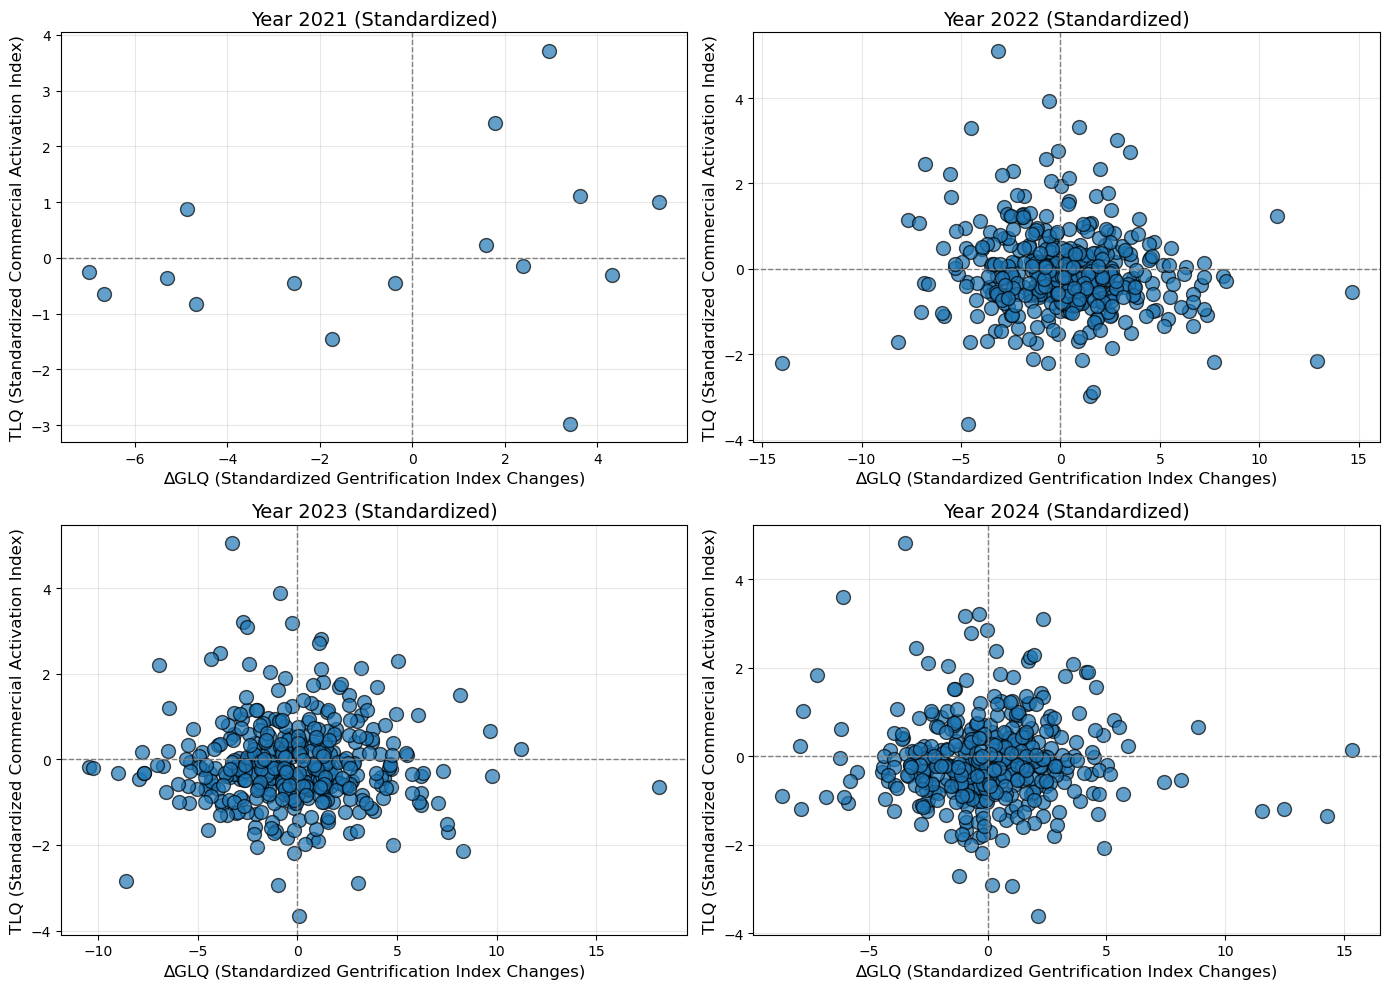

In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

columns_to_scale = ['delta_glq', 'tlq', 'pop_total', 'pop_floating', 'rent_lq', 'facility_lq']

merged_df_sorted[columns_to_scale] = scaler.fit_transform(merged_df_sorted[columns_to_scale])

annual_aggregates_scaled = merged_df_sorted.groupby(['dong', 'year']).agg({
    'delta_glq': 'sum',
    'tlq': 'mean',
    'pop_total': 'mean',
    'pop_floating': 'mean',
    'rent_lq': 'mean',
    'facility_lq': 'mean'
}).reset_index()

unique_years = annual_aggregates_scaled['year'].unique()

plt.figure(figsize=(14, 10))

for i, year in enumerate(sorted(unique_years)):
    plt.subplot(2, 2, i + 1)
    year_data = annual_aggregates_scaled[annual_aggregates_scaled['year'] == year]
    plt.scatter(year_data['delta_glq'], year_data['tlq'], alpha=0.7, edgecolors='k', s=100)
    plt.title(f'Year {year} (Standardized)', fontsize=14)
    plt.xlabel('∆GLQ (Standardized Gentrification Index Changes)', fontsize=12)
    plt.ylabel('TLQ (Standardized Commercial Activation Index)', fontsize=12)
    plt.grid(alpha=0.3)
    plt.axhline(y=0, color='gray', linestyle='--', linewidth=1)
    plt.axvline(x=0, color='gray', linestyle='--', linewidth=1)

plt.tight_layout()
plt.show()
